# Car Price Predictor

## Objective
To build a machine learning model using Linear Regression that accurately predicts used car prices based on various features such as car age, fuel type, transmission, location, mileage, and engine specifications.



## Problem Statement
The used car market is large and unstructured. Buyers and sellers struggle to identify fair market prices. This project aims to:

Clean and preprocess historical car listings data.

Explore patterns that affect car prices.

Use a linear regression algorithm to predict car prices.

Help platforms or users estimate the resale value of a car.

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Importing Data
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\car details v4.csv")

In [3]:
df.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
df.shape

(2059, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

missing_data=100-(4750/5000*100)
missing_data

na_mileage=df["Mileage"].isna()
na_engine_CC=df["Engine_CC"].isna()
na_power_bhp=df["Power_bhp"].isna()

(na_mileage==na_engine_CC).all()

(na_mileage==na_power_bhp).all()

(na_engine_CC==na_power_bhp).all()

In [8]:
df.isna().sum().sum()

745

In [9]:
df.isna().any(axis=1).sum()

185

In [10]:
# We make new column Car Age that calulates actual year of car from current year
df["Car Age"]=2025-df["Year"]

In [11]:
df["Car Age"]

0        8
1       11
2       14
3        6
4        7
        ..
2054     9
2055    11
2056    12
2057     7
2058     8
Name: Car Age, Length: 2059, dtype: int64

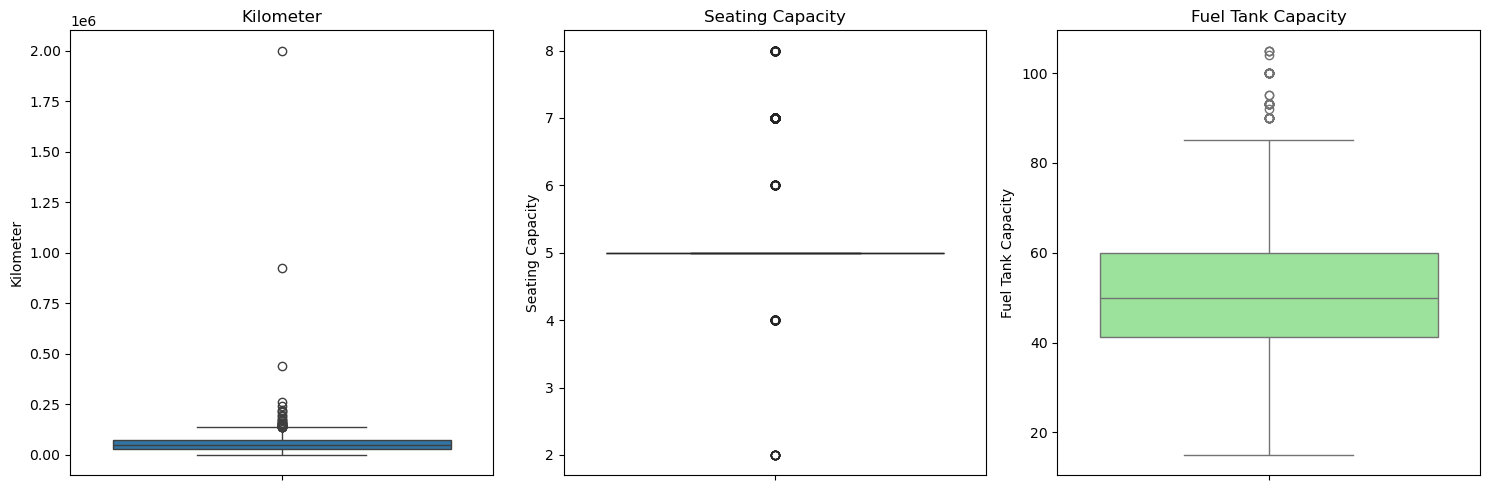

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Kilometer
sns.boxplot(df['Kilometer'],ax=axs[0])
axs[0].set_title('Kilometer')

#Engine
#sns.boxplot(df['Engine'],ax=axs[1])
#axs[1].set_title('Engine')

#Max Power
#sns.boxplot(df['Max Power'],ax=axs[2])
#axs[2].set_title('Max Power')

#Seating Capacity
sns.boxplot(df['Seating Capacity'],ax=axs[1],color='green')
axs[1].set_title('Seating Capacity')

#Fuel Tank Capacity
sns.boxplot(df["Fuel Tank Capacity"],ax=axs[2],color='lightgreen')
axs[2].set_title("Fuel Tank Capacity")

plt.tight_layout()
plt.show()

# Encoding


In [13]:
#Make
df['Make'].value_counts()

Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64

In [14]:
#Since there’s no natural order ,here also One-Hot Encoding is the best and safest method.

In [15]:
#Fuel Type
df["Fuel Type"].value_counts()

Fuel Type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: count, dtype: int64

In [16]:
#Since there’s no natural order for Fuel Type, we will be using One-Hot Encoding.

In [17]:
#Transmission
df['Transmission'].value_counts()

Transmission
Manual       1133
Automatic     926
Name: count, dtype: int64

In [18]:
#Since there’s no natural order for Transmission, we will be using One-Hot Encoding.

In [19]:
#Location
df['Location'].value_counts()

Location
Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Valsad                1
Siliguri              1
Name: count, Length: 77, dtype: int64

In [20]:
#Since there’s no natural order for Location, we will be using One-Hot Encoding.

In [21]:
#Owner
df['Owner'].value_counts()

Owner
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: count, dtype: int64

In [22]:
#It has 4 categories which has order i.e UnRegistered Car < 4 or More  < Fourth < Third  < Second < First .So Ordinal encoding would be appropriate here.¶

In [23]:
#Seller Type	
df["Seller Type"].value_counts()

Seller Type
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: count, dtype: int64

In [24]:
#Since "Individual", "Corporate", and "Commercial Registration" are nominal categories (no inherent order), One-Hot Encoding is the safest and most appropriate.

In [25]:
#Now we checking if there is trend or not by plotting the graphs


<Axes: xlabel='Make'>

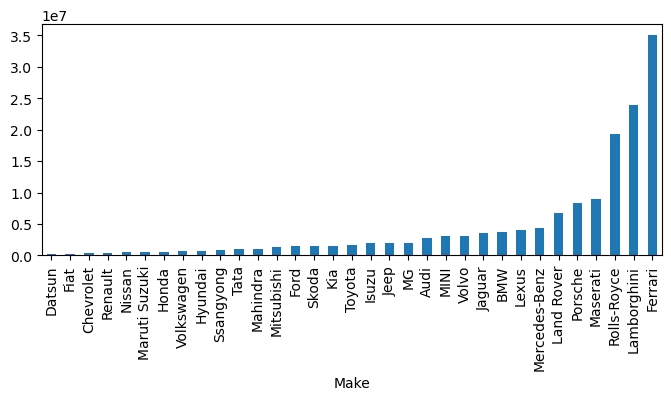

In [26]:
plt.figure(figsize=(8,3))
df.groupby('Make')['Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Fuel Type'>

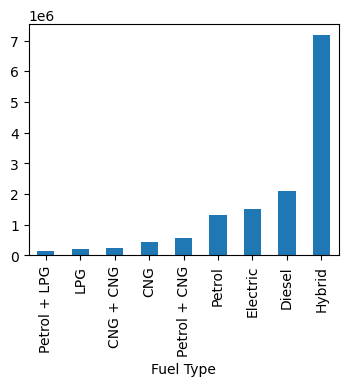

In [27]:
plt.figure(figsize=(4,3))
df.groupby('Fuel Type')["Price"].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Transmission'>

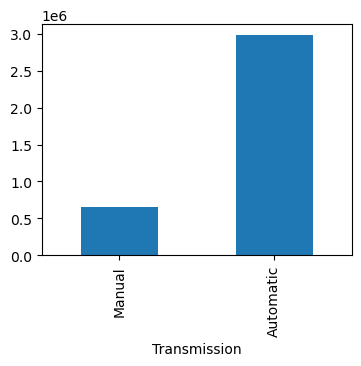

In [28]:
plt.figure(figsize=(4,3))
df.groupby('Transmission')['Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Seller Type'>

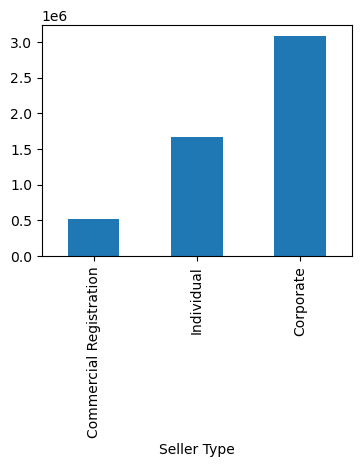

In [29]:
plt.figure(figsize=(4,3))
df.groupby('Seller Type')['Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Location'>

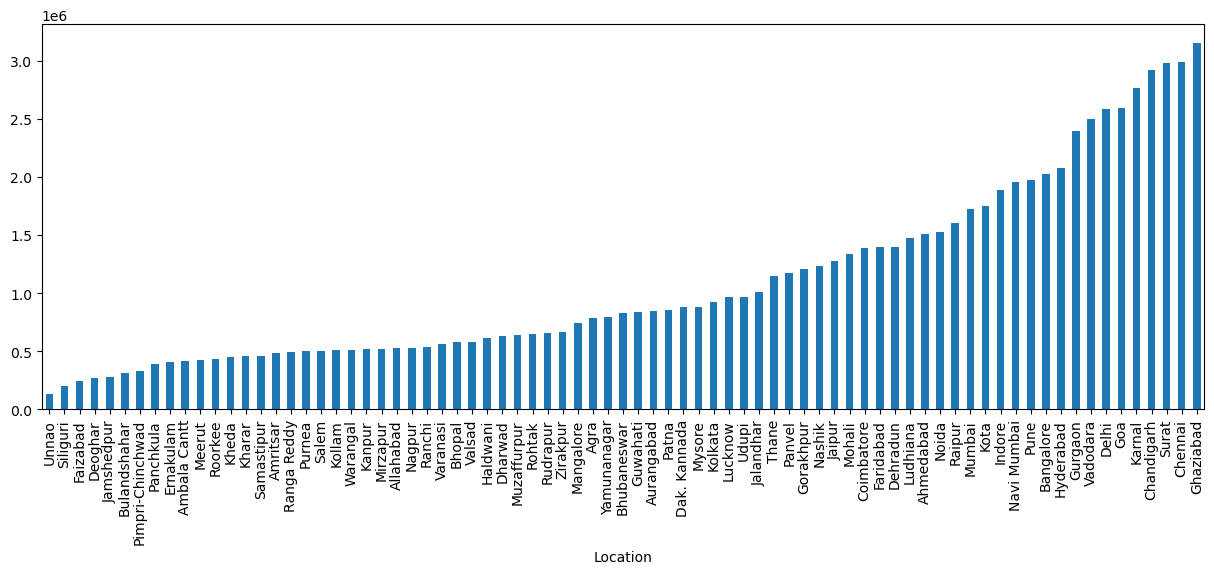

In [30]:
plt.figure(figsize=(15,5))
df.groupby('Location')['Price'].mean().sort_values().plot(kind='bar')

**In make , location and fuel Type columns since price varies systematically with make, target encoding captures this information directly.**
#**In Transmission and Seller Type column there are very few categories so we use one hot encoding**

#Earlier we saw that we have missing values so we have to impute those values and we have to encode categorical columns
>First we have to do train test split and then we impute values and encode columns to avoid data leakage

In [31]:
#seperating input and target
x=df.drop(['Price','Drivetrain','Color','Model','Max Torque','Max Torque','Length','Width','Height','Year'],axis=1)
y=df.iloc[:,2:3]

In [32]:
#split the data into tain and test part
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
x_train

,Make,Kilometer,Fuel Type,Transmission,Location,Owner,Seller Type,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age
817,Hyundai,95610,Diesel,Manual,Rudrapur,Second,Individual,1336 cc,89 bhp @ 4000 rpm,5.0,45.0,12
507,Kia,14000,Petrol,Manual,Delhi,First,Individual,1497 cc,114 bhp @ 6300 rpm,5.0,50.0,4
1794,Mercedes-Benz,12500,Diesel,Automatic,Hyderabad,UnRegistered Car,Individual,2148 cc,170@3700,5.0,66.0,3
452,Jaguar,43000,Diesel,Automatic,Delhi,First,Individual,1999 cc,177 bhp @ 4000 rpm,5.0,82.0,6
1148,Mercedes-Benz,81000,Diesel,Automatic,Ahmedabad,First,Individual,2987 cc,234@3800,5.0,95.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,Audi,89000,Diesel,Automatic,Mohali,Second,Individual,NaN,NaN,NaN,NaN,13
1180,Tata,9000,Petrol,Automatic,Pune,First,Individual,1199 cc,84 bhp @ 6000 rpm,5.0,35.0,4
1344,Audi,36000,Diesel,Automatic,Delhi,First,Individual,1968 cc,184 bhp @ 3500 rpm,5.0,64.0,8
527,Mahindra,57000,Diesel,Manual,Lucknow,First,Individual,2179 cc,153 bhp @ 3750 rpm,7.0,70.0,7


In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 817 to 1289
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Kilometer           1647 non-null   int64  
 2   Fuel Type           1647 non-null   object 
 3   Transmission        1647 non-null   object 
 4   Location            1647 non-null   object 
 5   Owner               1647 non-null   object 
 6   Seller Type         1647 non-null   object 
 7   Engine              1581 non-null   object 
 8   Max Power           1581 non-null   object 
 9   Seating Capacity    1595 non-null   float64
 10  Fuel Tank Capacity  1555 non-null   float64
 11  Car Age             1647 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 167.3+ KB


In [35]:
x_train.shape

(1647, 12)

In [36]:
y_train

,Price
817,360000
507,1525000
1794,5300000
452,5200000
1148,2150000
...,...
2009,775000
1180,795000
1344,2550000
527,1095000


In [37]:
y_train.shape

(1647, 1)

In [38]:
##Remove non-numeric characters from engine
x_train["Engine"]=pd.to_numeric(x_train["Engine"].str.replace('cc',''),errors='coerce')
x_test["Engine"]=pd.to_numeric(x_test["Engine"].str.replace('cc',''),errors='coerce')

In [39]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1263 to 1647
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Kilometer           412 non-null    int64  
 2   Fuel Type           412 non-null    object 
 3   Transmission        412 non-null    object 
 4   Location            412 non-null    object 
 5   Owner               412 non-null    object 
 6   Seller Type         412 non-null    object 
 7   Engine              398 non-null    float64
 8   Max Power           398 non-null    object 
 9   Seating Capacity    400 non-null    float64
 10  Fuel Tank Capacity  391 non-null    float64
 11  Car Age             412 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 41.8+ KB


In [40]:
##Remove non-numeric characters from engine
x_train['Max Power']=x_train['Max Power'].str.extract(r'(\d+\.?\d*)')   # extract numeric part only
x_train['Max Power']=pd.to_numeric(x_train['Max Power'],errors='coerce')

In [41]:
x_test["Max Power"]=x_test["Max Power"].str.extract(r'(\d+\.?\d*)')
x_test["Max Power"]=pd.to_numeric(x_test["Max Power"],errors='coerce')

In [42]:
#Now first we impute missing values

In [43]:
x_train.isnull().sum()

Make                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Owner                  0
Seller Type            0
Engine                66
Max Power             66
Seating Capacity      52
Fuel Tank Capacity    92
Car Age                0
dtype: int64

In [44]:
x_test.isnull().sum()

Make                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Owner                  0
Seller Type            0
Engine                14
Max Power             14
Seating Capacity      12
Fuel Tank Capacity    21
Car Age                0
dtype: int64

In [45]:
y_train.isnull().sum()

Price    0
dtype: int64

In [46]:
y_test.isnull().sum()

Price    0
dtype: int64

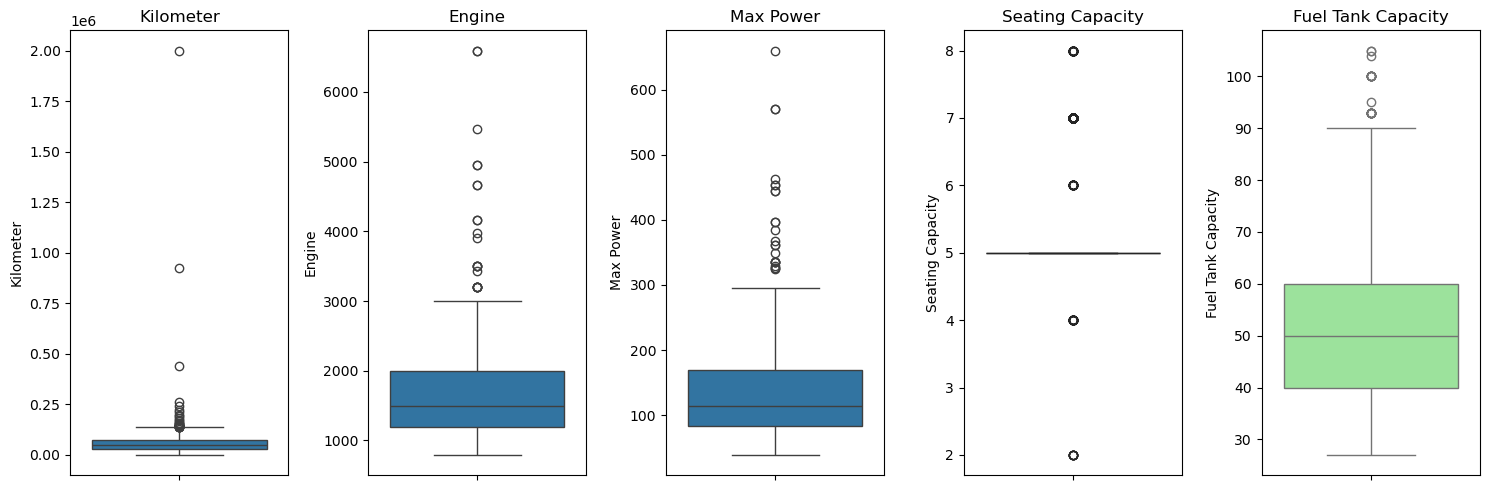

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

#Kilometer
sns.boxplot(x_train['Kilometer'],ax=axs[0])
axs[0].set_title('Kilometer')

#Engine
sns.boxplot(x_train['Engine'],ax=axs[1])
axs[1].set_title('Engine')

#Max Power
sns.boxplot(x_train['Max Power'],ax=axs[2])
axs[2].set_title('Max Power')

#Seating Capacity
sns.boxplot(x_train['Seating Capacity'],ax=axs[3],color='green')
axs[3].set_title('Seating Capacity')

#Fuel Tank Capacity
sns.boxplot(x_train["Fuel Tank Capacity"],ax=axs[4],color='lightgreen')
axs[4].set_title("Fuel Tank Capacity")

plt.tight_layout()
plt.show()

In [48]:
#1.Engine

In [49]:
x_train["Engine"]=x_train["Engine"].fillna(x_train["Engine"].median())
x_test["Engine"]=x_test["Engine"].fillna(x_test["Engine"].median())

In [50]:
#2.Max Power

In [51]:
x_train["Max Power"]=x_train["Max Power"].fillna(x_train["Max Power"].median())
x_test["Max Power"]=x_test["Max Power"].fillna(x_test["Max Power"].median())

In [52]:
#3.Seating Capacity

In [53]:
x_train["Seating Capacity"].value_counts()

Seating Capacity
5.0    1293
7.0     214
8.0      31
4.0      30
6.0      21
2.0       6
Name: count, dtype: int64

In [54]:
x_train["Seating Capacity"]=x_train["Seating Capacity"].fillna(x_train["Seating Capacity"].mode()[0])
x_test["Seating Capacity"]=x_test["Seating Capacity"].fillna(x_test["Seating Capacity"].mode()[0])

In [55]:
#4.Fuel Tank Capacity

In [56]:
x_train['Fuel Tank Capacity']=x_train['Fuel Tank Capacity'].fillna(x_train['Fuel Tank Capacity'].median())
x_test['Fuel Tank Capacity']=x_test['Fuel Tank Capacity'].fillna(x_test['Fuel Tank Capacity'].median())

In [57]:
x_train.isnull().sum()

Make                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Seating Capacity      0
Fuel Tank Capacity    0
Car Age               0
dtype: int64

In [58]:
x_test.isnull().sum()

Make                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Seating Capacity      0
Fuel Tank Capacity    0
Car Age               0
dtype: int64

In [59]:
# Outliers detection

In [60]:
def outliers_detection(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    Lower=Q1-IQR*1.5
    Upper=Q3+IQR*1.5
    if Lower < 0:
        Lower=0
    return Lower,Upper

In [61]:
Kilometer_Lower,Kilometer_Upper =outliers_detection(x_train["Kilometer"])
print(f'Lower Limit={Kilometer_Lower}')
print(f'Upper Limit={Kilometer_Upper}')

Lower Limit=0
Upper Limit=136044.75


In [62]:
Kilometer_train = x_train[(x_train['Kilometer']< Kilometer_Lower) |( x_train['Kilometer']> Kilometer_Upper)] 
Kilometer_test = x_test[(x_test['Kilometer']< Kilometer_Lower) |( x_test['Kilometer']> Kilometer_Upper)] 
print(f'Outliers in train data = {Kilometer_train.shape[0]}')
print(f'Outliers in test data = {Kilometer_test.shape[0]}')

Outliers in train data = 31
Outliers in test data = 5


In [63]:
Engine_lower , Engine_upper = outliers_detection(x_train['Engine'])
print(f'Lower Limit = {Engine_lower}')
print(f'Upper Limit = {Engine_upper}')

Lower Limit = 2.5
Upper Limit = 3190.5


In [64]:
Engine_train = x_train[(x_train['Engine']< Engine_lower) |( x_train['Engine']> Engine_upper)] 
Engine_test = x_test[(x_test['Engine']< Engine_lower) |( x_test['Engine']> Engine_upper)] 
print(f'Outliers in train data = {Engine_train.shape[0]}')
print(f'Outliers in test data = {Engine_test.shape[0]}')

Outliers in train data = 22
Outliers in test data = 3


In [65]:
Max_Power_lower , Max_Power_upper = outliers_detection(x_train['Max Power'])
print(f'Lower Limit = {Max_Power_lower}')
print(f'Upper Limit = {Max_Power_upper}')

Lower Limit = 0
Upper Limit = 298.0


In [66]:
Max_Power_train=x_train[(x_train["Max Power"]< Max_Power_lower) | (x_train["Max Power"] > Max_Power_upper)]
Max_Power_test=x_test[(x_test["Max Power"] < Max_Power_lower) |(x_test["Max Power"] > Max_Power_upper)]
print(f'Outliers in Train data ={Max_Power_train.shape[0]}')
print(f'Outliers in Test data ={Max_Power_test.shape[0]}')

Outliers in Train data =23
Outliers in Test data =8


In [67]:
Seating_Capacity_lower , Seating_Capacity_upper = outliers_detection(x_train['Seating Capacity'])
print(f'Lower Limit = {Seating_Capacity_lower}')
print(f'Upper Limit = {Seating_Capacity_upper}')

Lower Limit = 5.0
Upper Limit = 5.0


In [68]:
Seating_Capacity_train=x_train[(x_train["Seating Capacity"]< Seating_Capacity_lower) | (x_train["Seating Capacity"] > Seating_Capacity_upper)]
Seating_Capacity_test=x_test[(x_test["Seating Capacity"] < Seating_Capacity_lower) |(x_test["Seating Capacity"] > Seating_Capacity_upper)]
print(f'Outliers in Train data ={Seating_Capacity_train.shape[0]}')
print(f'Outliers in Test data ={Seating_Capacity_test.shape[0]}')

Outliers in Train data =302
Outliers in Test data =78


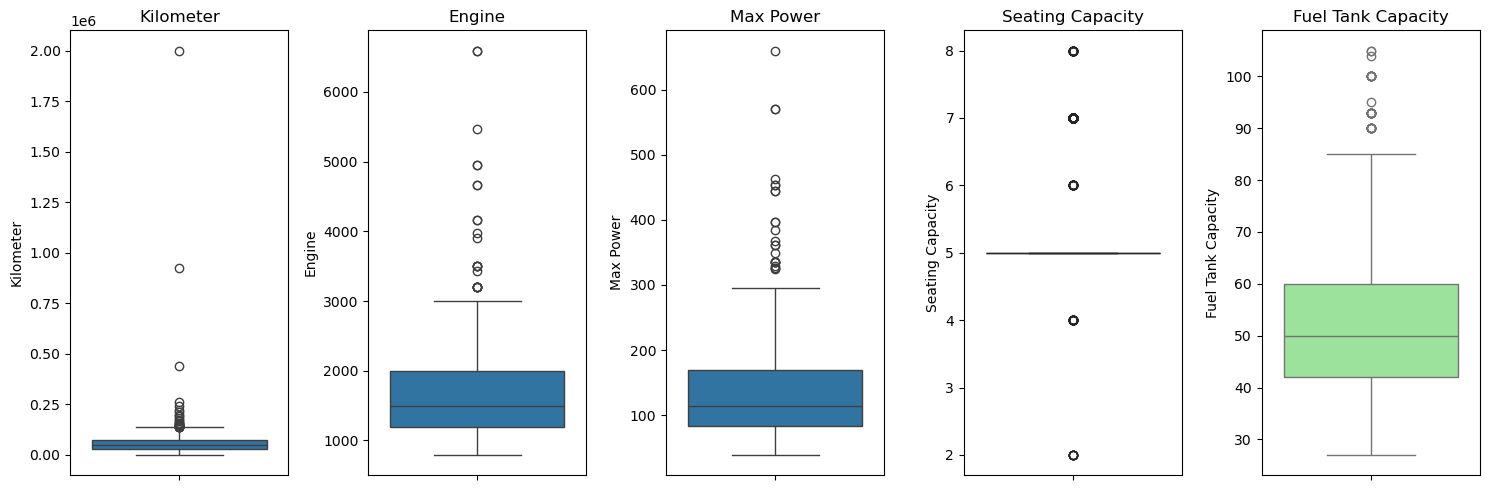

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

#Kilometer
sns.boxplot(x_train['Kilometer'],ax=axs[0])
axs[0].set_title('Kilometer')

#Engine
sns.boxplot(x_train['Engine'],ax=axs[1])
axs[1].set_title('Engine')

#Max Power
sns.boxplot(x_train['Max Power'],ax=axs[2])
axs[2].set_title('Max Power')

#Seating Capacity
sns.boxplot(x_train['Seating Capacity'],ax=axs[3],color='green')
axs[3].set_title('Seating Capacity')

#Fuel Tank Capacity
sns.boxplot(x_train["Fuel Tank Capacity"],ax=axs[4],color='lightgreen')
axs[4].set_title("Fuel Tank Capacity")

plt.tight_layout()
plt.show()

In [70]:
#cap Kilometer
x_train['Kilometer']=x_train['Kilometer'].clip(lower=Kilometer_Lower,upper=Kilometer_Upper)
x_test['Kilometer']=x_test['Kilometer'].clip(lower=Kilometer_Lower,upper=Kilometer_Upper)

In [71]:
#cap Engine
x_train["Engine"]=x_train["Engine"].clip(lower=Engine_lower,upper=Engine_upper)
x_test["Engine"]=x_test["Engine"].clip(lower=Engine_lower,upper=Engine_upper)

In [72]:
#cap Max Power
x_train["Max Power"]=x_train["Max Power"].clip(lower=Max_Power_lower,upper=Max_Power_upper)
x_test["Max Power"]=x_test["Max Power"].clip(lower=Max_Power_lower,upper=Max_Power_upper)

In [73]:
#cap Fuel Tank Capacity
x_train["Seating Capacity"]=x_train["Seating Capacity"].clip(lower=Seating_Capacity_lower,upper=Seating_Capacity_upper)
x_test["Seating Capacity"]=x_test["Seating Capacity"].clip(lower=Seating_Capacity_lower,upper=Seating_Capacity_upper)

In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 817 to 1289
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Kilometer           1647 non-null   float64
 2   Fuel Type           1647 non-null   object 
 3   Transmission        1647 non-null   object 
 4   Location            1647 non-null   object 
 5   Owner               1647 non-null   object 
 6   Seller Type         1647 non-null   object 
 7   Engine              1647 non-null   float64
 8   Max Power           1647 non-null   float64
 9   Seating Capacity    1647 non-null   float64
 10  Fuel Tank Capacity  1647 non-null   float64
 11  Car Age             1647 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 167.3+ KB


In [75]:
#Price

Text(0.5, 1.0, 'Test data price')

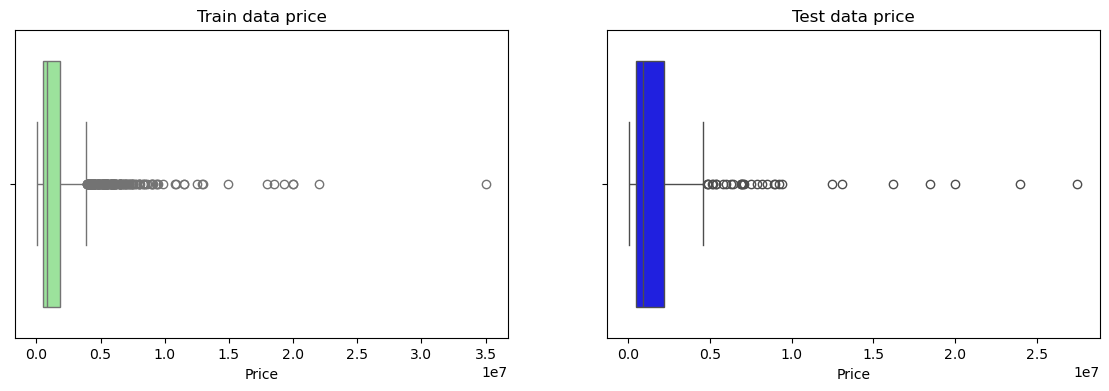

In [76]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(14,4))

sns.boxplot(x="Price",data=y_train, ax=axs[0] , color="lightgreen")
axs[0].set_title('Train data price')

sns.boxplot(x="Price",data=y_test,ax=axs[1],color="blue")
axs[1].set_title('Test data price')

In [77]:
Price_lower , Price_upper = outliers_detection(y_train['Price'])
print(f'Lower Limit :{Price_lower}')
print(f'Upper Limit:{Price_upper}')

Lower Limit :0
Upper Limit:3912499.5


In [78]:
price_train=y_train[(y_train['Price']<Price_lower) | (y_train["Price"]>Price_upper)]
price_test=y_test[(y_test['Price']<Price_lower) | (y_test["Price"]>Price_upper)]
print(f'Outliers in train data = {price_train.shape[0]}')
print(f'Outliers in test data = {price_test.shape[0]}')

Outliers in train data = 180
Outliers in test data = 44


<Axes: xlabel='Price', ylabel='Density'>

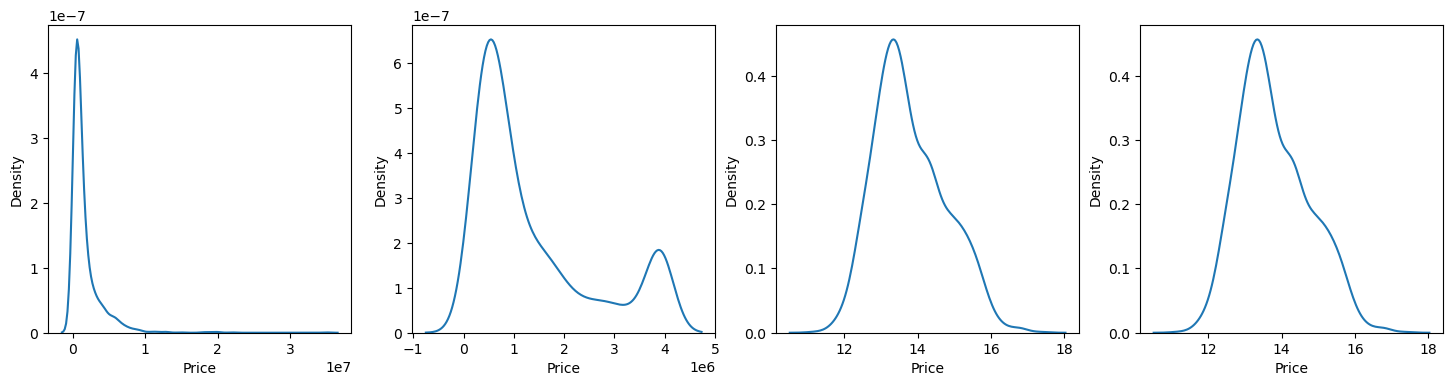

In [79]:
fig,axs = plt.subplots(nrows=1,ncols=4,figsize=(18,4))

sns.kdeplot(y_train["Price"],ax=axs[0])
sns.kdeplot(y_train["Price"].clip(Price_lower,Price_upper),ax=axs[1])
sns.kdeplot(np.log(y_train["Price"]),ax=axs[2])
sns.kdeplot(np.log1p(y_train["Price"]),ax=axs[3])



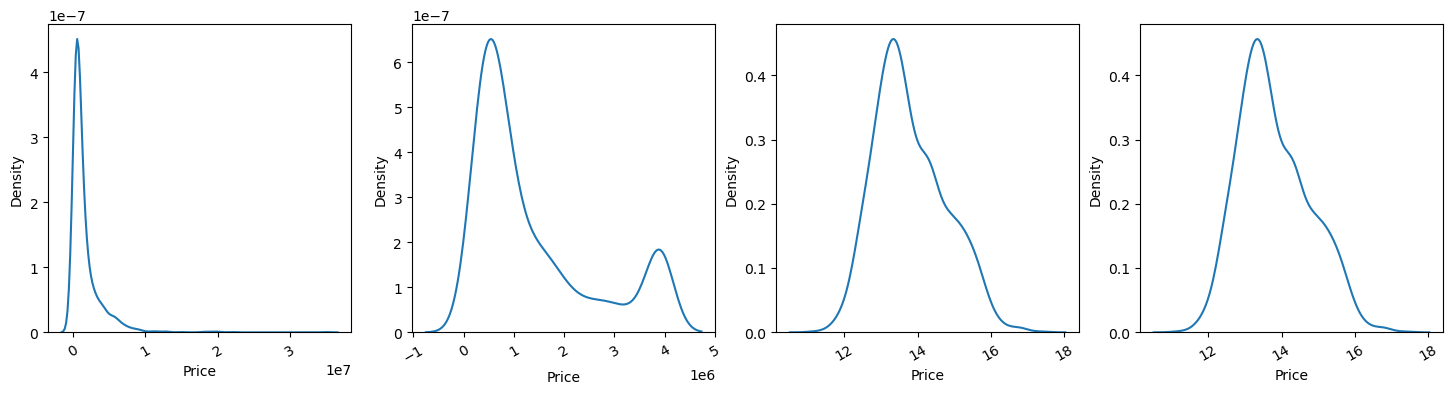

In [80]:
fig,axs = plt.subplots(nrows=1,ncols=4,figsize=(18,4))

sns.kdeplot(y_train['Price'],ax=axs[0])
sns.kdeplot(y_train['Price'].clip(Price_lower,Price_upper),ax=axs[1])
sns.kdeplot(np.log(y_train['Price']),ax=axs[2])
sns.kdeplot(np.log1p(y_train['Price']),ax=axs[3])

for ax in axs:
    ax.tick_params(axis='x', rotation=30)

In [81]:
#Since Salary can contains zero we use 'np.log1p(x)' instead of 'np.log(x)'

In [82]:
y_train["Log_Price"]=np.log1p(y_train["Price"])
y_test["Log_Price"]=np.log1p(y_test["Price"])

Text(0.5, 1.0, 'Test Data price')

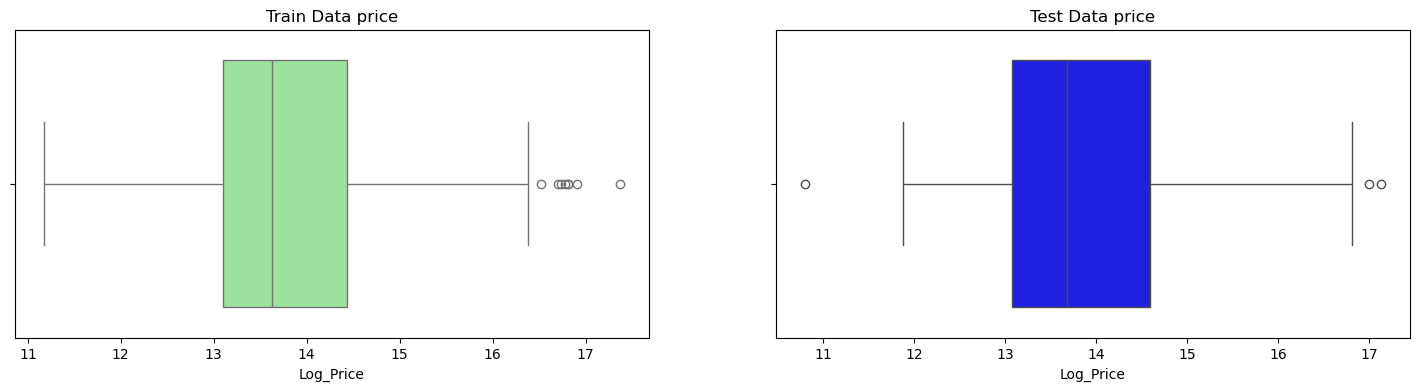

In [83]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(18,4))

sns.boxplot(x='Log_Price',data=y_train,ax=axs[0],color="Lightgreen")
axs[0].set_title('Train Data price')

sns.boxplot(x='Log_Price',data=y_test,ax=axs[1],color="Blue")
axs[1].set_title('Test Data price')

In [84]:
Log_Price_lower,Log_Price_upper =outliers_detection(y_train["Log_Price"])
print(f'Lower Limit :{Log_Price_lower}')
print(f'Upper Limit :{Log_Price_upper}')

Lower Limit :11.090482339534628
Upper Limit :16.44128527520319


In [85]:
Log_Price_train=y_train[(y_train["Log_Price"] < Log_Price_lower) | (y_train["Log_Price"] > Log_Price_upper)]
Log_Price_test=y_test[(y_test["Log_Price"] < Log_Price_lower) | (y_test["Log_Price"] > Log_Price_upper)]
print(f'Outliers in train data = {Log_Price_train.shape[0]}')
print(f'Outliers in test data = {Log_Price_test.shape[1]}')

Outliers in train data = 8
Outliers in test data = 2


Not necessarily. More "outliers" on the log scale:

Does not mean your data is bad.
It just means more values are now far from the log-median.
Many ML models (especially Linear Regression) handle log-scale outliers better than skewed raw values.

In [86]:
#Encoding

In [87]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [88]:
x_train.head()

,Make,Kilometer,Fuel Type,Transmission,Location,Owner,Seller Type,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age
817,Hyundai,95610.0,Diesel,Manual,Rudrapur,Second,Individual,1336.0,89.0,5.0,45.0,12
507,Kia,14000.0,Petrol,Manual,Delhi,First,Individual,1497.0,114.0,5.0,50.0,4
1794,Mercedes-Benz,12500.0,Diesel,Automatic,Hyderabad,UnRegistered Car,Individual,2148.0,170.0,5.0,66.0,3
452,Jaguar,43000.0,Diesel,Automatic,Delhi,First,Individual,1999.0,177.0,5.0,82.0,6
1148,Mercedes-Benz,81000.0,Diesel,Automatic,Ahmedabad,First,Individual,2987.0,234.0,5.0,95.0,11


In [89]:
Categorical_columns = ['Make','Fuel Type','Transmission','Location','Seller Type']
OHE = OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')                  # Here we have drop='first' to avoid dummy variable trap but here we will not do later w'll drop 
Categorical_Encoded_train = OHE.fit_transform(x_train[Categorical_columns]).astype(int)
Categorical_Encoded_train_names = OHE.get_feature_names_out(Categorical_columns)
Encoded_cat_DF_train = pd.DataFrame(Categorical_Encoded_train, columns = Categorical_Encoded_train_names , index=x_train.index)

In [90]:
Encoded_cat_DF_train.head(2)

,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,...,Location_Udupi,Location_Unnao,Location_Vadodara,Location_Valsad,Location_Varanasi,Location_Warangal,Location_Yamunanagar,Location_Zirakpur,Seller Type_Corporate,Seller Type_Individual
817,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
Encoded_cat_DF_train.shape

(1647, 115)

In [92]:
Categorical_Encoded_test = OHE.transform(x_test[Categorical_columns]).astype(int)
Categorical_Encoded_test_names = OHE.get_feature_names_out(Categorical_columns)
Encoded_cat_DF_test = pd.DataFrame(Categorical_Encoded_test, columns = Categorical_Encoded_test_names , index=x_test.index)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [93]:
Encoded_cat_DF_test.head(2)

,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,...,Location_Udupi,Location_Unnao,Location_Vadodara,Location_Valsad,Location_Varanasi,Location_Warangal,Location_Yamunanagar,Location_Zirakpur,Seller Type_Corporate,Seller Type_Individual
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1742,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
Encoded_cat_DF_test.shape

(412, 115)

In [95]:
Owner_Encode_train = x_train['Owner'].values.reshape(-1, 1)
Owner_encoder = OrdinalEncoder(categories=[['First','Second','Third','Fourth','4 or More','UnRegistered Car']])
Owner_Encoded_train = Owner_encoder.fit_transform(Owner_Encode_train).astype(int)

In [96]:
x_test['Owner'].value_counts()

Owner
First               325
Second               75
Third                 8
UnRegistered Car      4
Name: count, dtype: int64

In [97]:
x_train['Owner'].value_counts()

Owner
First               1294
Second               298
Third                 34
UnRegistered Car      17
Fourth                 3
4 or More              1
Name: count, dtype: int64

In [98]:
Owner_Encoded_train[:3]

array([[1],
       [0],
       [5]])

In [99]:
Owner_Encoded_train_DF = pd.DataFrame(Owner_Encoded_train,columns=['Owner'],index=x_train.index)
Owner_Encoded_train_DF.head(3)

,Owner
817,1
507,0
1794,5


In [100]:
x_test.head(3)

,Make,Kilometer,Fuel Type,Transmission,Location,Owner,Seller Type,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age
1263,Toyota,68195.0,Petrol,Manual,Ahmedabad,First,Individual,1794.0,132.0,5.0,55.0,16
1742,BMW,9500.0,Petrol,Automatic,Chandigarh,First,Individual,2998.0,298.0,5.0,83.0,4
1326,Maruti Suzuki,45000.0,CNG,Manual,Pune,First,Individual,796.0,48.0,5.0,35.0,8


In [101]:
Owner_Encode_test = x_test['Owner'].values.reshape(-1, 1)
Owner_Encoded_test = Owner_encoder.transform(Owner_Encode_test).astype(int)

In [102]:
Owner_Encoded_test[:3]

array([[0],
       [0],
       [0]])

In [103]:
Owner_Encoded_test_DF = pd.DataFrame(Owner_Encoded_test,columns=['Owner'],index=x_test.index)
Owner_Encoded_test_DF.head(3)

,Owner
1263,0
1742,0
1326,0


In [104]:
#Combining all encoded columns

In [105]:
x_train_encoded = pd.concat([Owner_Encoded_train_DF , Encoded_cat_DF_train],axis=1)
x_train_encoded.head(2)

,Owner,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,...,Location_Udupi,Location_Unnao,Location_Vadodara,Location_Valsad,Location_Varanasi,Location_Warangal,Location_Yamunanagar,Location_Zirakpur,Seller Type_Corporate,Seller Type_Individual
817,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
x_train_encoded.shape

(1647, 116)

In [107]:
x_test_encoded = pd.concat([Owner_Encoded_test_DF , Encoded_cat_DF_test],axis=1)
x_test_encoded.head(2)

,Owner,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,...,Location_Udupi,Location_Unnao,Location_Vadodara,Location_Valsad,Location_Varanasi,Location_Warangal,Location_Yamunanagar,Location_Zirakpur,Seller Type_Corporate,Seller Type_Individual
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1742,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
x_test_encoded.shape

(412, 116)

In [109]:
#We have successfully encoded all the categorical columns and mad one final data frame now we will go for scaling of numerical features

In [110]:
#Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [112]:
Numerical_Feature = ['Kilometer' , 'Engine' , 'Max Power' , 'Seating Capacity','Fuel Tank Capacity','Car Age']

In [113]:
x_train_scaled = scaler.fit_transform(x_train[Numerical_Feature])
x_test_scaled = scaler.transform(x_test[Numerical_Feature])

In [114]:
x_train_scaled_DF = pd.DataFrame(x_train_scaled, columns = Numerical_Feature, index=x_train.index)
x_test_scaled_DF = pd.DataFrame(x_test_scaled, columns = Numerical_Feature, index=x_test.index)

In [115]:
x_train_scaled_DF.head(2)

,Kilometer,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age
817,1.409635,-0.583180,-0.676138,0.0,-0.464541,1.034733
507,-1.280437,-0.301484,-0.230161,0.0,-0.117488,-1.383437


In [116]:
x_train_scaled_DF.shape

(1647, 6)

In [117]:
x_test_scaled_DF.head(2)

,Kilometer,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age
1263,0.505967,0.218166,0.090943,0.0,0.229565,2.243817
1742,-1.428769,2.324763,3.052230,0.0,2.173062,-1.383437


In [118]:
x_test_scaled_DF.shape

(412, 6)

In [119]:
#Final Train and Test Data

In [120]:
X_TRAIN = pd.concat([x_train_scaled_DF,x_train_encoded],axis=1)
X_TRAIN.head(2)

,Kilometer,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age,Owner,Make_BMW,Make_Chevrolet,Make_Datsun,...,Location_Udupi,Location_Unnao,Location_Vadodara,Location_Valsad,Location_Varanasi,Location_Warangal,Location_Yamunanagar,Location_Zirakpur,Seller Type_Corporate,Seller Type_Individual
817,1.409635,-0.583180,-0.676138,0.0,-0.464541,1.034733,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
507,-1.280437,-0.301484,-0.230161,0.0,-0.117488,-1.383437,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
X_TRAIN.shape

(1647, 122)

In [122]:
X_TEST = pd.concat([x_test_scaled_DF,x_test_encoded],axis=1)
X_TEST.head(2)

,Kilometer,Engine,Max Power,Seating Capacity,Fuel Tank Capacity,Car Age,Owner,Make_BMW,Make_Chevrolet,Make_Datsun,...,Location_Udupi,Location_Unnao,Location_Vadodara,Location_Valsad,Location_Varanasi,Location_Warangal,Location_Yamunanagar,Location_Zirakpur,Seller Type_Corporate,Seller Type_Individual
1263,0.505967,0.218166,0.090943,0.0,0.229565,2.243817,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1742,-1.428769,2.324763,3.052230,0.0,2.173062,-1.383437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
X_TEST.shape

(412, 122)

In [124]:
Y_TRAIN =pd.DataFrame(y_train['Log_Price'])
Y_TRAIN.head(2)

,Log_Price
817,12.793862
507,14.237506


In [125]:
Y_TEST =pd.DataFrame(y_test['Log_Price'])
Y_TEST.head(2)

,Log_Price
1263,12.873905
1742,16.341239


#After completing all essential preprocessing steps such as handling missing values, encoding categorical variables, scaling numerical features, and transforming the target variable, the next step is to apply a Machine Learning algorithm to predict salaries. We begin with Linear Regression as our baseline model.

In [126]:
#Linear Regression


In [127]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [128]:
model.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

In [129]:
model.score(X_TRAIN,Y_TRAIN)

0.9492876747593558

In [130]:
print(f'Intercept: {model.intercept_}')
print(f'Coeficients: {model.coef_}')

Intercept: [13.84477945]
Coeficients: [[-4.21557528e-02  5.84092068e-02  2.92616593e-01 -2.74273657e+11
   1.10182416e-01 -4.03062091e-01 -1.52044095e-02  2.36849774e-02
  -7.96877841e-01 -1.03486252e+00  1.75294971e+00 -6.71175957e-01
  -5.43739319e-01 -4.60186005e-01 -5.21818161e-01 -4.37580109e-01
   2.42214203e-01 -4.01165009e-01 -3.57218742e-01  3.98955345e-01
   4.24627304e-01 -4.19075012e-01  3.93302917e-01 -5.32731056e-01
  -5.31604767e-01  9.76638794e-02 -3.76838684e-01 -5.55800438e-01
   7.53566742e-01 -7.24714279e-01  2.00173473e+00 -3.93432617e-01
  -8.52648973e-01 -6.48532391e-01 -2.18925476e-01 -5.55740356e-01
   9.39178467e-03  1.85867310e-01  1.60876274e-01  5.50606728e-01
  -4.90951538e-03  1.06811523e-04 -7.60555267e-03  8.06293488e-01
  -1.48509979e-01  8.76655579e-02  1.29262924e-01 -4.27017212e-02
   8.25233459e-02  2.10399628e-01  2.77648926e-01  2.10653305e-01
   1.07519150e-01 -3.30380678e-01  5.89585304e-02  2.67675400e-01
   3.06121826e-01  3.20713043e-01  1.0

In [131]:
Y_PRED = model.predict(X_TEST)

In [132]:
Y_PRED[:2]

array([[12.86926298],
       [15.97895099]])

In [133]:
Y_PRED_TRANSFORM=np.expm1(Y_PRED)

In [134]:
Y_PRED_TRANSFORM[:2]

array([[ 388193.96575781],
       [8701020.47922434]])

In [135]:
Y_TEST_TRANSFORM = np.expm1(Y_TEST)

In [136]:
Y_TEST_TRANSFORM[:2]

,Log_Price
1263,390000.0
1742,12500000.0


In [137]:
from sklearn.metrics import root_mean_squared_error, r2_score ,mean_squared_error

rmse = root_mean_squared_error(Y_TEST, Y_PRED)
r2 = r2_score(Y_TEST, Y_PRED)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 0.30
R² Score: 0.91


In [138]:
categorical_cols = ['Fuel Type', 'Transmission', 'Seller Type', 'Owner', 'Location']
numeric_cols = ['Kilometer', 'Engine', 'Max Power', 'Seating Capacity', 'Fuel Tank Capacity', 'Car Age']

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [140]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


In [141]:
from sklearn.model_selection import cross_val_score

# Use raw (non-encoded, non-scaled) training data
cv_scores = cross_val_score(model_pipeline, x_train, y_train, cv=5, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Average R²:", cv_scores.mean())


Cross-validated R² scores: [0.74211795 0.70477558 0.75019577 0.73258037 0.81272992]
Average R²: 0.74847992045836


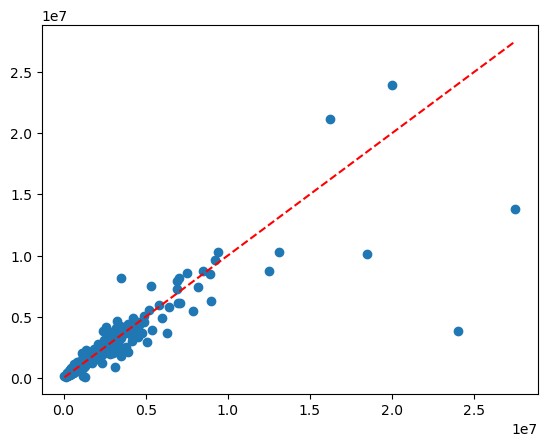

In [142]:
plt.scatter(Y_TEST_TRANSFORM,Y_PRED_TRANSFORM)
plt.plot([Y_TEST_TRANSFORM.min(),Y_TEST_TRANSFORM.max()],[Y_TEST_TRANSFORM.min(),Y_TEST_TRANSFORM.max()],'r--')

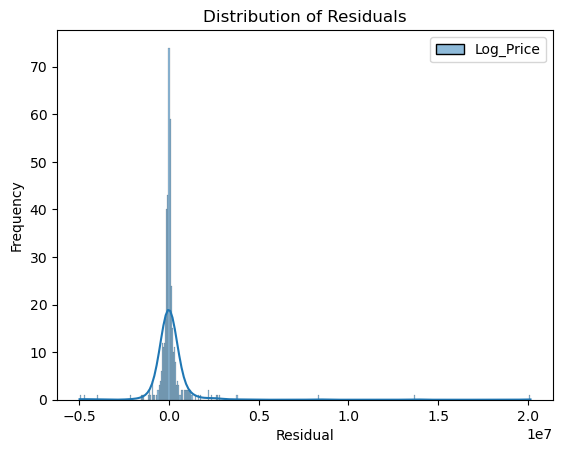

In [143]:
residual = Y_TEST_TRANSFORM - Y_PRED_TRANSFORM
sns.histplot(residual,kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [144]:
#Conclusion

In [145]:
from sklearn.linear_model import Ridge, Lasso

In [146]:
# Initialize and train Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_TRAIN, Y_TRAIN)

# Predict
ridge_pred = ridge.predict(X_TEST)

# Evaluate
ridge_rmse = np.sqrt(mean_squared_error(Y_TEST, ridge_pred))
ridge_r2 = r2_score(Y_TEST, ridge_pred)

print(f"Ridge RMSE: {ridge_rmse:.2f}")
print(f"Ridge R² Score: {ridge_r2:.2f}")

Ridge RMSE: 0.30
Ridge R² Score: 0.91


In [147]:
# Initialize and train Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_TRAIN, Y_TRAIN)

# Predict
lasso_pred = lasso.predict(X_TEST)

# Evaluate
lasso_rmse = np.sqrt(mean_squared_error(Y_TEST, lasso_pred))
lasso_r2 = r2_score(Y_TEST, lasso_pred)

print(f"Lasso RMSE: {lasso_rmse:.2f}")
print(f"Lasso R² Score: {lasso_r2:.2f}")

Lasso RMSE: 0.36
Lasso R² Score: 0.87


In [148]:
# Create DataFrame to compare models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [rmse, ridge_rmse, lasso_rmse],
    'R² Score': [r2, ridge_r2, lasso_r2]
})

print(results)

               Model      RMSE  R² Score
0  Linear Regression  0.302815  0.911027
1   Ridge Regression  0.300275  0.912513
2   Lasso Regression  0.358956  0.874978


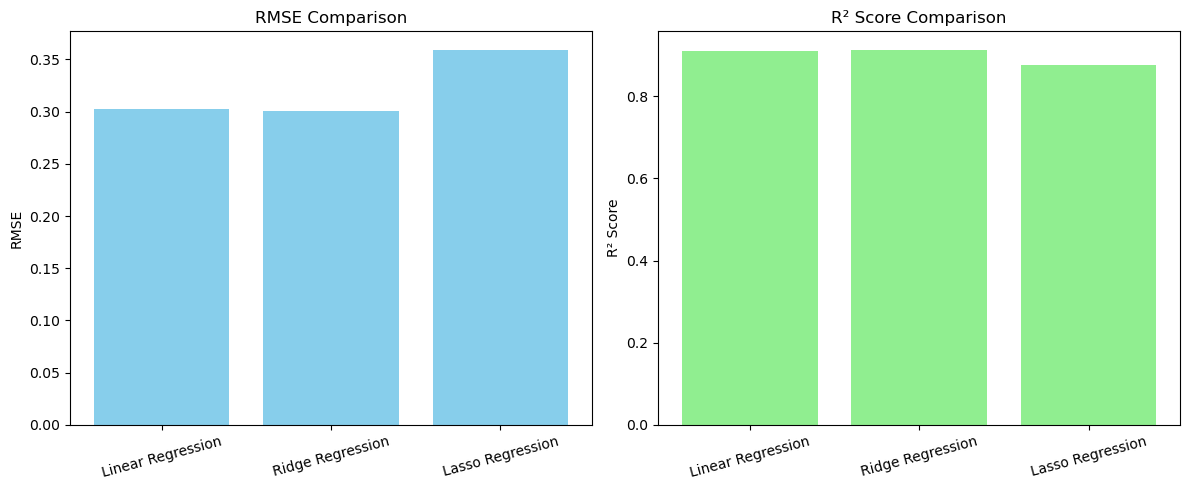

In [149]:
# Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE Bar Plot
ax[0].bar(results['Model'], results['RMSE'], color='skyblue')
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].tick_params(axis='x', rotation=15)

# R² Bar Plot
ax[1].bar(results['Model'], results['R² Score'], color='lightgreen')
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')
ax[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

## Key Insights
Data Preprocessing:
Missing values were detected primarily in:

Mileage, Engine_CC, Power_bhp – all missing in the same rows.

Outliers detected through boxplots in:

Kilometer, Seating Capacity, Fuel Tank Capacity.

New feature Car Age was derived from the Year column:
Car Age = 2025 - Year.

Encoding:
Used One-Hot Encoding for all categorical variables with no natural order:

Make

Fuel Type

Transmission

Location

Owner

Model Training:
Features were split into X (predictors) and y (price).

Linear Regression model trained on training set.

Model performance evaluated using:

R² score (coefficient of determination)

Mean Squared Error (MSE)

## Key Business Insights
#Car Age:Newer cars tend to have higher prices; price drops with age.
#Fuel & Transmission:Fuel type and transmission influence price — automatic cars often cost more.
#Location:City affects pricing due to demand/supply, taxes, and regulations.
#Mileage:Lower mileage generally increases resale value.

##  Conclusion
The model effectively uses a multivariate linear regression approach to predict car prices.

The preprocessing and feature engineering (e.g., Car Age, encoding) helped boost prediction reliability.

Visual exploration (boxplots) revealed distribution anomalies and guided outlier handling.



##  Final Recommendations
Deploy the model into a used car marketplace platform to auto-suggest prices to sellers.

Include more features like insurance status, number of accidents, or car condition to improve accuracy.

Regularly retrain the model with updated data to account for market shifts.

Create dashboards for price trends by car brand, year, and location using Power BI or Tableau.

